<h1>Titanic</h1>
<p>Based on https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

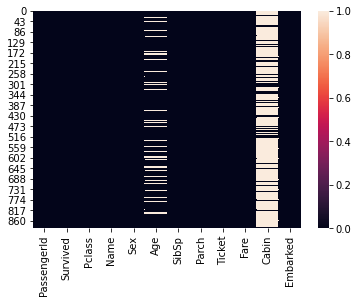

In [3]:
sns.heatmap(df.isnull())

In [4]:
from sklearn.impute import SimpleImputer
#from mlmachine.features.preprocessing import GroupbyImputer

#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#imputer = GroupbyImputer(null_column="Age", groupby_column="Sex", strategy="mean")
#res = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
#df['age_imp'] = res
#df.sample(10)

In [5]:
by_sex_class = df.groupby(['Sex','Pclass'])
def impute_median(series):
    return series.fillna(series.median())
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
df['age_auto'] = by_sex_class.Age.transform(impute_median)
#titanic_2['Age'].equals(titanic_2['new_age'])
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_auto
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,25.0
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S,25.0
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,65.0
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S,42.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

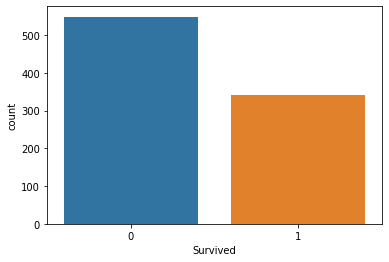

In [6]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

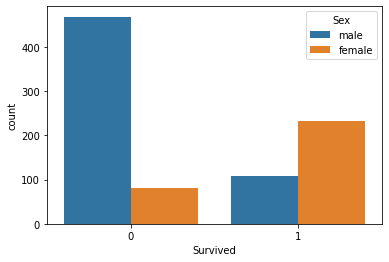

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

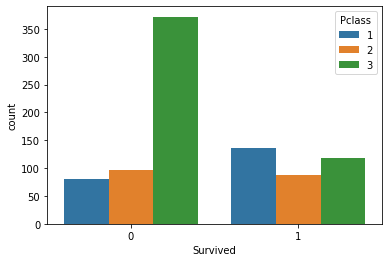

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

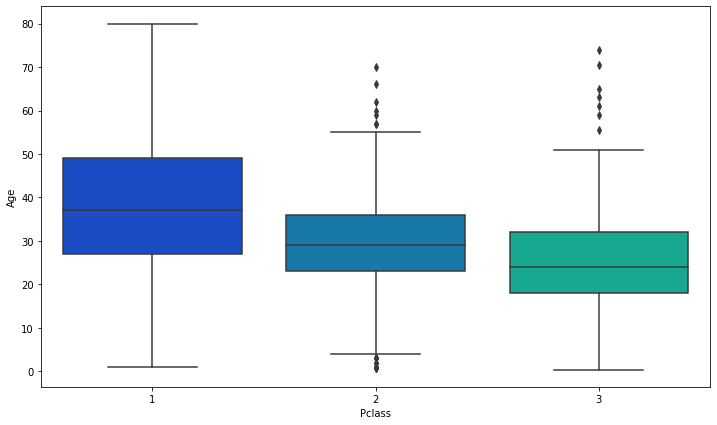

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

<AxesSubplot:>

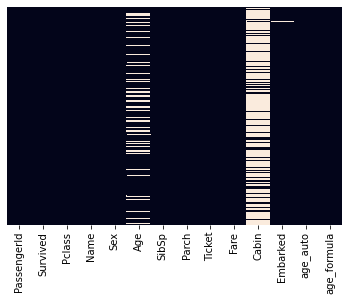

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['age_formula'] = df[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_auto     891 non-null    float64
 13  age_formula  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [12]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [13]:
df = pd.concat([df,sex,embark],axis=1)

In [14]:
# Works out Embarked_encoded based on p(Survival|Embarked='x')
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['Embarked_encoded'] = encoder.fit_transform(df['Embarked'], df['Survived'])

C:\DataScience\Anaconda\envs\p37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [15]:
df.drop(['Cabin','Sex','Embarked','Name','Ticket', 'Age'],axis=1,inplace=True)
df.sample(5)


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age_auto,age_formula,male,Q,S,Embarked_encoded
429,430,1,3,0,0,8.0500,32.0,32.0,1,0,1,0.336957
471,472,0,3,0,0,8.6625,38.0,38.0,1,0,1,0.336957
802,803,1,1,1,2,120.0000,11.0,11.0,1,0,1,0.336957
488,489,0,3,0,0,8.0500,30.0,30.0,1,0,1,0.336957
822,823,0,1,0,0,0.0000,38.0,38.0,1,0,1,0.336957


In [16]:
# Choose one of the ages to remove
# age_formula
# age_auto
#
#
# Decide whether to keep new embark column
# Embarked_encoded
df.drop(['age_formula'], axis=1,inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression(solver='liblinear', max_iter=5000)
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)   

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

[[134  20]
 [ 37  77]]


In [37]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif', 'Corr'])
    xx=data.drop(['Survived'],axis=1)
    x_var_names = xx.columns
    for i in range(0, x_var_names.shape[0]):
        y = xx[x_var_names[i]]
        x = xx[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        print(i, x_var_names[i], r_squared, data.corr()['Survived'][i])
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif, data.corr()['Survived'][i]]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

#X=df.drop(['Survived'],axis=1)
calculate_vif(df)


###### NOTE WORKING CORRECTLY

0 PassengerId 0.7519816911963506 -0.005006660767066476
1 Pclass 0.9372470105064604 1.0
2 SibSp 0.37001089262001274 -0.33848103596101586
3 Parch 0.3867657145208966 -0.03532249888573588
4 Fare 0.5713780222972453 0.08162940708348222
5 age_auto 0.8697887028994784 0.2573065223849618
6 male -1.7612102053722762 -0.059579368461496085
7 Q 0.43030482084357524 -0.5433513806577526
8 S 0.30540522661032576 0.003650382683972286
9 Embarked_encoded 0.9467183804997858 -0.15566027340439476


,Var,Vif,Corr
9,Embarked_encoded,18.77,-0.155660
1,Pclass,15.94,1.000000
5,age_auto,7.68,0.257307
0,PassengerId,4.03,-0.005007
4,Fare,2.33,0.081629
7,Q,1.76,-0.543351
3,Parch,1.63,-0.035322
2,SibSp,1.59,-0.338481
8,S,1.44,0.003650
6,male,0.36,-0.059579


In [21]:
#df.drop(['S','female'],axis=1,inplace=True)
#X=df.drop(['Survived'],axis=1)
#calculate_vif(X)

In [32]:
df.corr()['Survived']

PassengerId        -0.005007
Survived            1.000000
Pclass             -0.338481
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
age_auto           -0.059579
male               -0.543351
Q                   0.003650
S                  -0.155660
Embarked_encoded    0.181814
Name: Survived, dtype: float64

In [33]:
df.corr()['Survived']['male']

-0.5433513806577526

In [27]:
df['Fare'].corr()

TypeError: corr() missing 1 required positional argument: 'other'